Loading metrics by date from /Users/benabbas/Hospitals-Covid-Data-Pipeline/output/metrics/by_date...
Loading overall metrics from /Users/benabbas/Hospitals-Covid-Data-Pipeline/output/metrics/overall...


<Figure size 1000x600 with 0 Axes>

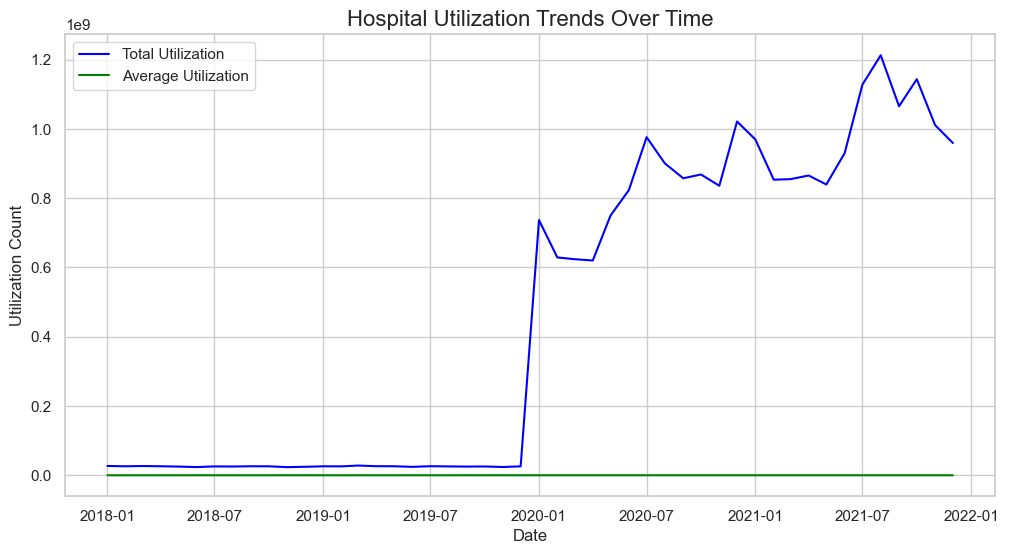

/var/folders/6h/dd2x92s115s4xbsjw__y6qv40000gn/T/ipykernel_8539/1383707071.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


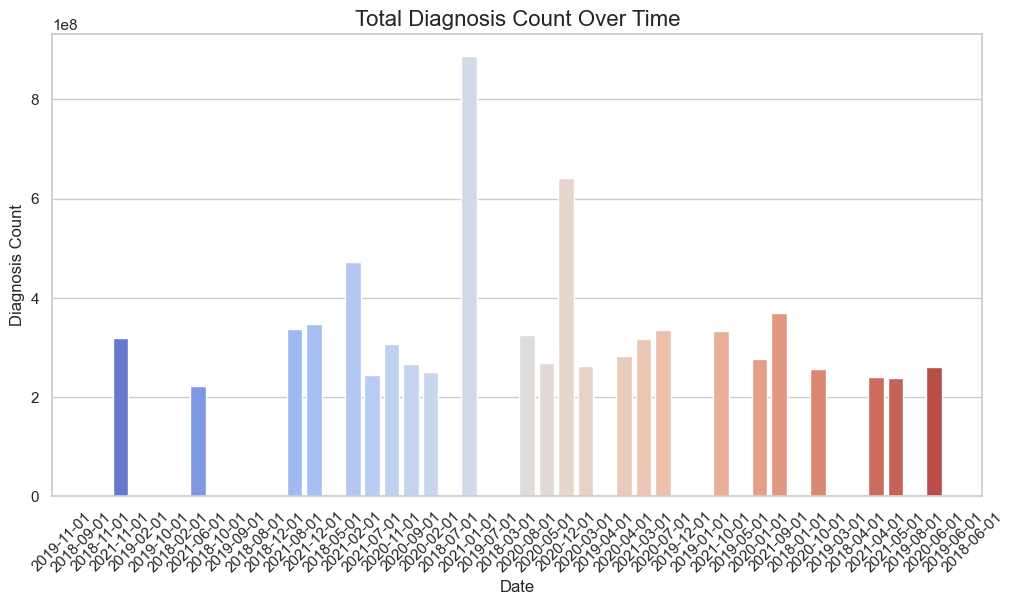

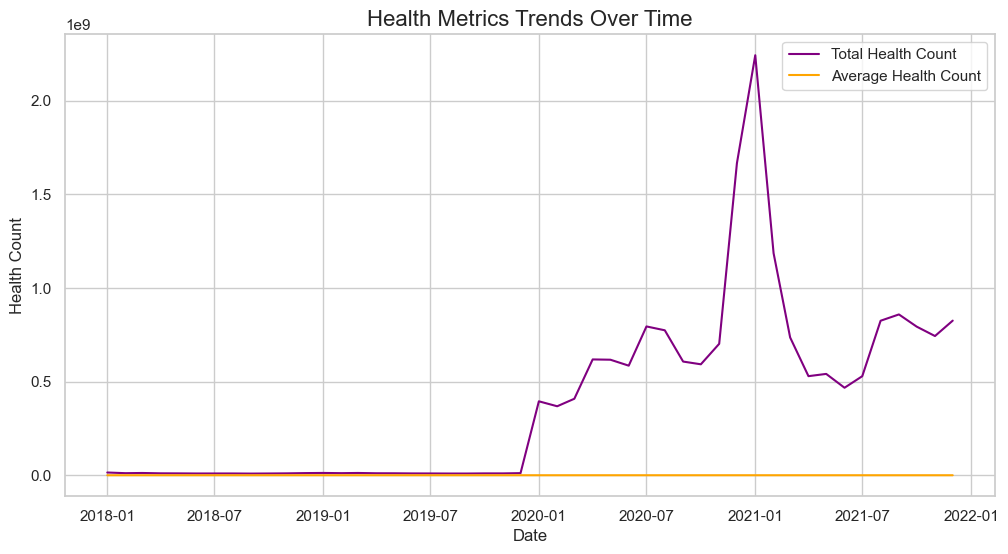

/var/folders/6h/dd2x92s115s4xbsjw__y6qv40000gn/T/ipykernel_8539/1383707071.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=overall_metrics_long, x="Metric", y="Value", palette="viridis")


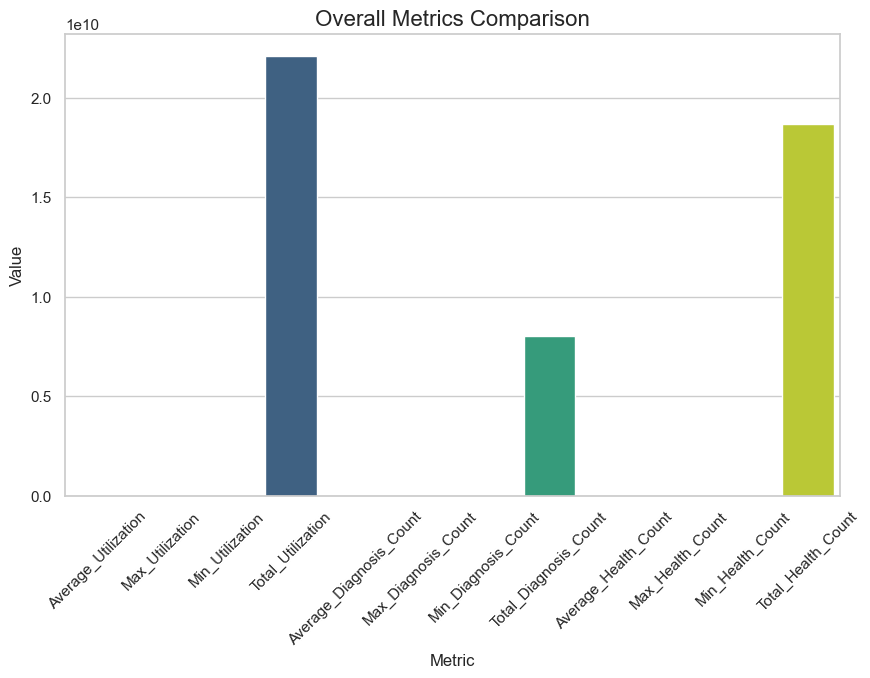

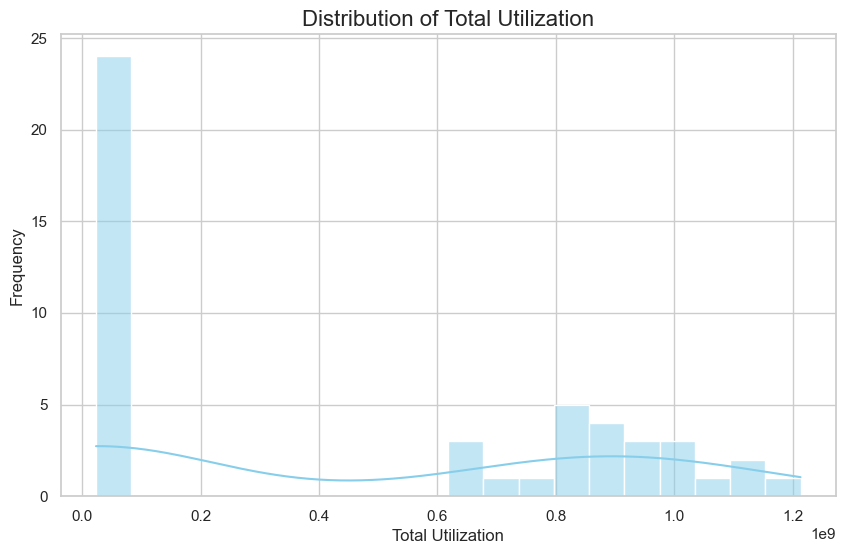

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


metrics_path = "/Users/benabbas/Hospitals-Covid-Data-Pipeline/output/metrics"
metrics = pd.read_parquet(metrics_path)

cleaned_data_path = "/Users/benabbas/Hospitals-Covid-Data-Pipeline/output/cleaned_data_processed"
cleaned_data = pd.read_parquet(cleaned_data_path)

# Set seaborn style
sns.set(style="whitegrid", palette="muted")

metrics_by_date_path = "/Users/benabbas/Hospitals-Covid-Data-Pipeline/output/metrics/by_date"
overall_metrics_path = "/Users/benabbas/Hospitals-Covid-Data-Pipeline/output/metrics/overall"

print(f"Loading metrics by date from {metrics_by_date_path}...")
metrics_by_date = pd.read_parquet(metrics_by_date_path)

print(f"Loading overall metrics from {overall_metrics_path}...")
overall_metrics = pd.read_parquet(overall_metrics_path)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))

def plot_utilization_trends():
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=metrics_by_date, x="Date", y="Total_Utilization", color="blue", label="Total Utilization")
    sns.lineplot(data=metrics_by_date, x="Date", y="Average_Utilization", color="green", label="Average Utilization")
    plt.title("Hospital Utilization Trends Over Time", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Utilization Count", fontsize=12)
    plt.legend()
    plt.show()

def plot_diagnosis_distribution():
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=metrics_by_date,
        x="Date",
        y="Total_Diagnosis_Count",
        palette="coolwarm"
    )
    plt.title("Total Diagnosis Count Over Time", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Diagnosis Count", fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

def plot_health_distribution():
    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=metrics_by_date,
        x="Date",
        y="Total_Health_Count",
        color="purple",
        label="Total Health Count"
    )
    sns.lineplot(
        data=metrics_by_date,
        x="Date",
        y="Average_Health_Count",
        color="orange",
        label="Average Health Count"
    )
    plt.title("Health Metrics Trends Over Time", fontsize=16)
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Health Count", fontsize=12)
    plt.legend()
    plt.show()

def plot_overall_metrics():
    overall_metrics_long = overall_metrics.melt(var_name="Metric", value_name="Value")
    plt.figure(figsize=(10, 6))
    sns.barplot(data=overall_metrics_long, x="Metric", y="Value", palette="viridis")
    plt.title("Overall Metrics Comparison", fontsize=16)
    plt.xticks(rotation=45)
    plt.xlabel("Metric", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.show()

def plot_utilization_distribution():
    plt.figure(figsize=(10, 6))
    sns.histplot(
        metrics_by_date["Total_Utilization"],
        bins=20,
        kde=True,
        color="skyblue"
    )
    plt.title("Distribution of Total Utilization", fontsize=16)
    plt.xlabel("Total Utilization", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.show()

def plot_correlation_heatmap():
    plt.figure(figsize=(10, 8))
    correlation_matrix = cleaned_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap of Metrics", fontsize=16)
    plt.tight_layout()
    plt.show()

def plot_stacked_bar_health():
    plt.figure(figsize=(12, 6))
    health_trends = cleaned_data.groupby(["Date", "Health_Category"])["Health_Count"].sum().unstack(fill_value=0)
    health_trends.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis", width=0.8)
    plt.title("Stacked Bar Chart of Health Categories Over Time", fontsize=16)
    plt.ylabel("Health Count")
    plt.xlabel("Date")
    plt.legend(loc="upper right", title="Health Category")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_utilization_by_facility():
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=cleaned_data, x="Facility", y="Utilization_Count")
    plt.title("Distribution of Utilization Count by Facility", fontsize=16)
    plt.ylabel("Utilization Count")
    plt.xlabel("Facility")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

def plot_health_category_trends():
    plt.figure(figsize=(12, 6))
    selected_categories = ["COVID-19", "cancer", "diabetes"]
    category_data = cleaned_data[cleaned_data["Health_Category"].isin(selected_categories)]
    sns.lineplot(data=category_data, x="Date", y="Health_Count", hue="Health_Category", marker="o")
    plt.title("Trends for Selected Health Categories", fontsize=16)
    plt.ylabel("Health Count")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.legend(title="Health Category")
    plt.tight_layout()
    plt.show()

def plot_diagnosis_category_distribution():
    plt.figure(figsize=(8, 8))
    diagnosis_distribution = cleaned_data["Diagnosis_Category"].value_counts()
    diagnosis_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=140, cmap="viridis")
    plt.title("Distribution of Diagnosis Categories", fontsize=16)
    plt.ylabel("")  
    plt.tight_layout()
    plt.show()

def plot_health_category_trends():
    plt.figure(figsize=(12, 6))
    selected_categories = ["COVID-19", "cancer", "diabetes"]
    category_data = cleaned_data[cleaned_data["Health_Category"].isin(selected_categories)]
    sns.lineplot(data=category_data, x="Date", y="Health_Count", hue="Health_Category", marker="o")
    plt.title("Trends for Selected Health Categories", fontsize=16)
    plt.ylabel("Health Count")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.legend(title="Health Category")
    plt.tight_layout()
    plt.show()

def plot_diagnosis_category_distribution():
    plt.figure(figsize=(8, 8))
    diagnosis_distribution = cleaned_data["Diagnosis_Category"].value_counts()
    diagnosis_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=140, cmap="viridis")
    plt.title("Distribution of Diagnosis Categories", fontsize=16)
    plt.ylabel("")  
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    plot_utilization_trends()
    plot_diagnosis_distribution()
    plot_health_distribution()
    plot_overall_metrics()
    plot_utilization_distribution()
    plot_correlation_heatmap()
    plot_stacked_bar_health()
    plot_utilization_by_facility()
    plot_health_category_trends()
    plot_diagnosis_category_distribution()
